## Importing and cleaning information for the analysis

In [ ]:
# Importing Libraries
import ast # To convert the skils to a list
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data (Job postings)
df = pd.read_csv(r"C:\Users\WIN10\Desktop\Job_Analysis_Canada_2025\Job_CSV\jobs_postings.csv")


# Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Create the column month (data will be analyzed monthly)

df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

# Filter by the year and sorting by month
df_2025 = df[df['job_posted_date'].dt.year == 2025].copy()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_2025['job_posted_month'] = pd.Categorical(
    df_2025['job_posted_month'],
    categories=month_order,
    ordered=True
)

## What is the most optimal skills to learn for Data Analysts and Data Scientists?

### Metholodgy
1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

### Getting the data for Data Analysts and Scientists in Canada

In [2]:
# Filtering data to get the one for Data Analysts in Canada
df_ca_da = (df_2025[(df_2025['job_country'] == 'Canada') 
            & (df_2025['job_title_short'] == 'Data Analyst')]
            .copy())

# Filtering data to get the one for Data Scientist in Canada
df_ca_ds = (df_2025[(df_2025['job_country'] == 'Canada') 
            & (df_2025['job_title_short'] == 'Data Scientist')]
            .copy())

# Drop the columns with no salary for Data Analysts
df_ca_da = df_ca_da.dropna(subset=['salary_year_avg'])

# Drop the columns with no salary for Data Scientists
df_ca_ds = df_ca_ds.dropna(subset=['salary_year_avg'])

# Exploding the column of job skills to get the count for Data Analysts
df_da_ex = df_ca_da.explode('job_skills')

# Exploding the column of job skills to get the count for Data Scientists
df_ds_ex = df_ca_ds.explode('job_skills')

### Grouping by the skills and getting the count of postings and the median salary for each skills for Data Analysts/Scientists

In [3]:
# Getting the values for Data Analysts
df_da_skills = df_da_ex.groupby('job_skills').agg(
    median_salary=('salary_year_avg','median'),
    count_skills=('job_title_short', 'count')
).sort_values(by='count_skills', ascending=False)

# Getting the values for Data Scientists
df_ds_skills = df_ds_ex.groupby('job_skills').agg(
    median_salary=('salary_year_avg','median'),
    count_skills=('job_title_short', 'count')
).sort_values(by='count_skills', ascending=False)

### Getting the percentage of the skills based on the total job postings

In [4]:
# Getting the total of job postings for Data Analysts
df_da_total = len(df_ca_da)

# Getting the total of job postings for Data Scientists
df_ds_total = len(df_ca_ds)

# Create the column for the percentaje for Data Analysts
df_da_skills['percent_skill'] = 100 * df_da_skills['count_skills'] / df_da_total


# Create the column for the percentaje for Data Scientists
df_ds_skills['percent_skill'] = 100 * df_ds_skills['count_skills'] / df_ds_total

# Filter the new dataframe with jobs with a higher percentage than 5% to include skill with demand for Data Analysts
df_da_highd = df_da_skills[df_da_skills['percent_skill'] > 9]

# Filter the new dataframe with jobs with a higher percentage than 5% to include skill with demand for Data Scientists
df_ds_highd = df_ds_skills[df_ds_skills['percent_skill'] > 9]



### Plotting to check the most in-demand skills based on Salary and occurrence

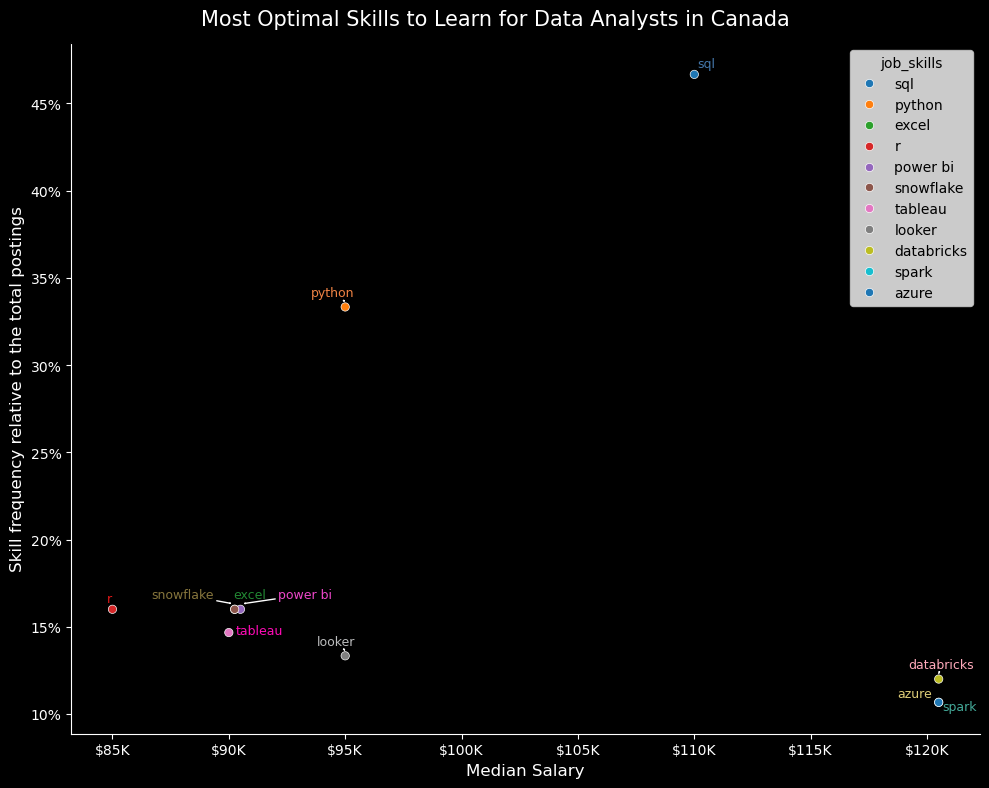

In [5]:
# Import Adjust text to put the labels on the scatter plot
from adjustText import adjust_text

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Sytling
sns.scatterplot(data=df_da_highd, 
                x='median_salary', 
                y='percent_skill', 
                ax=ax, hue='job_skills', 
                palette='tab10')

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_facecolor('black')
ax.tick_params(color='white', labelcolor='white')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax.set_xlabel('Median Salary', color='white', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y)}%"))
ax.set_ylabel('Skill frequency relative to the total postings', color='white', fontsize=12)


# Palette of colors for the different skills (11)
palette = [
    "#4477AA", "#F08344", "#228833", "#E41818", "#EE47CA",
    "#86753C", "#FF0BB6", "#BBBCBD", "#FFAABB", "#44AA99", "#DDCC77"
]

# Labeling the points
texts = []

for i, row in df_da_highd.reset_index().iterrows():
    if i % 2 == 0:
        texts.append(
            ax.text(
                row['median_salary'],
                row['percent_skill'] + 0.3,
                row['job_skills'],
                color=palette[i],
                fontsize=9,
                ha='left'
            )
        )
    else:
        texts.append(
            ax.text(
                row['median_salary'],
                row['percent_skill'] + 0.3,
                row['job_skills'],
                color=palette[i],
                fontsize=9,
                ha='right'
            )
        )

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='white'))

fig.suptitle('Most Optimal Skills to Learn for Data Analysts in Canada', color='white', fontsize=15)
fig.patch.set_facecolor('black')
fig.tight_layout()
plt.show()


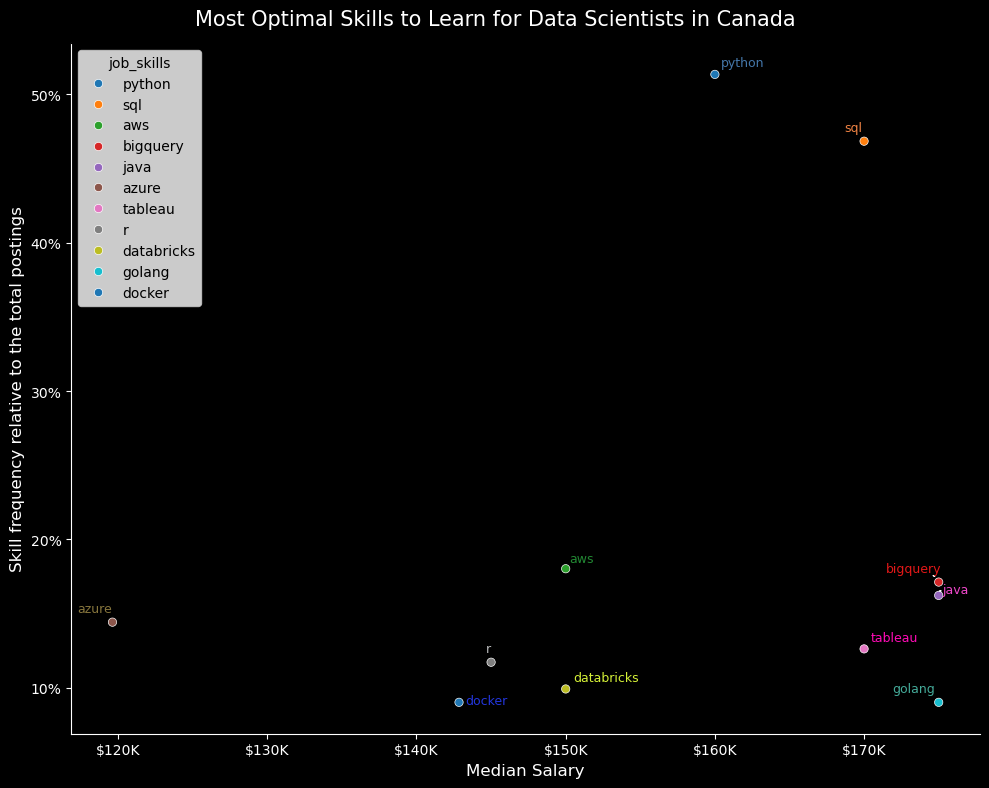

In [6]:
# Import Adjust text to put the labels on the scatter plot
from adjustText import adjust_text

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Sytling
sns.scatterplot(data=df_ds_highd, 
                x='median_salary', 
                y='percent_skill', 
                ax=ax, 
                hue='job_skills', 
                palette='tab10')

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_facecolor('black')
ax.tick_params(color='white', labelcolor='white')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax.set_xlabel('Median Salary', color='white', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y)}%"))
ax.set_ylabel('Skill frequency relative to the total postings', color='white', fontsize=12)


# Palette of colors for the different skills (11)
palette = [
    "#4477AA", "#F08344", "#228833", "#E41818", "#EE47CA",
    "#86753C", "#FF0BB6", "#BBBCBD", "#D5F137", "#44AA99", "#2336DD"
]

# Labeling the points
texts = []

for i, row in df_ds_highd.reset_index().iterrows():
    if i % 2 == 0:
        texts.append(
            ax.text(
                row['median_salary'],
                row['percent_skill'] + 0.3,
                row['job_skills'],
                color=palette[i],
                fontsize=9,
                ha='left'
            )
        )
    else:
        texts.append(
            ax.text(
                row['median_salary'],
                row['percent_skill'] + 0.3,
                row['job_skills'],
                color=palette[i],
                fontsize=9,
                ha='right'
            )
        )

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='white'))

fig.suptitle('Most Optimal Skills to Learn for Data Scientists in Canada', color='white', fontsize=15)
fig.patch.set_facecolor('black')
fig.tight_layout()
plt.show()


### Analysis of the technologies for the skills

In [ ]:
# Get a series of the job_type skills to find the prevalent technologies
df_tech = df_2025['job_type_skills'].copy()

# Dropping duplicates and NaN values
df_tech = df_tech.drop_duplicates()
df_tech = df_tech.dropna()

# Combine all dictionaries in one
tech_dict = {}

for row in df_tech:
    row_dict = ast.literal_eval(row)  # Convert string into a dictionary
    for key, value in row_dict.items():
        if key in tech_dict: # If key already exists in tech_dict, add value to existing key
            tech_dict[key] += value
        else:                # If key already exists in tech_dict, add key and value
            tech_dict[key] = value
            
# Removing duplicates by converting values to set and then back to a list
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))
    
# Use the dictionary and create a data frame to later on merge
df_technologies = pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])

# Explode the skills column
df_technologies = df_technologies.explode('skills')

# Merge with our original dataframe (for Data Analysts)
df_da_merge = pd.merge(df_da_highd.reset_index(), df_technologies, left_on='job_skills', right_on='skills')

# Merge with our original dataframe (for Data Scientists)
df_ds_merge = pd.merge(df_ds_highd.reset_index(), df_technologies, left_on='job_skills', right_on='skills')


### Plotting the skills based on the technology

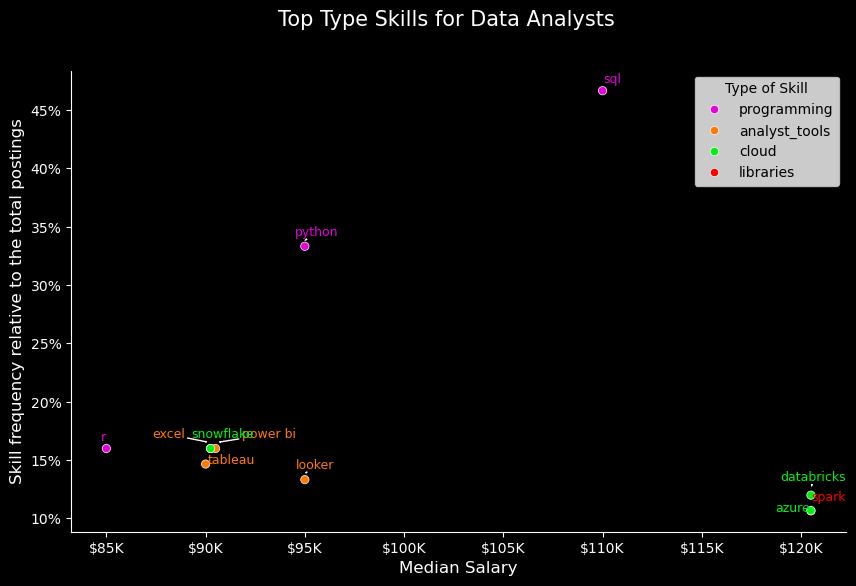

In [8]:
# Plotting for Data Analysts
from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(10, 6))

hue_palette = ["#E403D8", "#FF7B00", "#00F014", "#FA0000"]
# Styling
sns.scatterplot(data=df_da_merge, 
                x='median_salary', 
                y='percent_skill', 
                ax=ax, hue='technology', 
                palette=hue_palette)

ax.legend().set_title('Type of Skill')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y)}%"))
ax.set_facecolor('black')
ax.tick_params(color='white', labelcolor='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_ylabel('Skill frequency relative to the total postings', color='white', fontsize=12)
ax.set_xlabel('Median Salary', color='white', fontsize=12)

# Palette of colors for the different skills (11) - To match the hue palette
palette = [
    "#E403D8", "#E403D8", "#FF7B00", "#E403D8", "#FF7B00",
    "#00F014", "#FF7B00", "#FF7B00", "#00F014", "#FA0000", "#00F014"
]

# Prepare texts for adjust Text
texts = []

for i, row in df_da_highd.reset_index().iterrows():
    if i % 2 == 0:
        texts.append(
            ax.text(
                row['median_salary'],
                row['percent_skill'] + 0.5,
                row['job_skills'],
                color=palette[i],
                fontsize=9,
                ha='left'
            )
        )
    else:
        texts.append(
            ax.text(
                row['median_salary'],
                row['percent_skill'] + 0.5,
                row['job_skills'],
                color=palette[i],
                fontsize=9,
                ha='right'
            )
        )        
    

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='white'))



fig.suptitle('Top Type Skills for Data Analysts', color='white', fontsize=15)
fig.patch.set_facecolor('black')
plt.show()


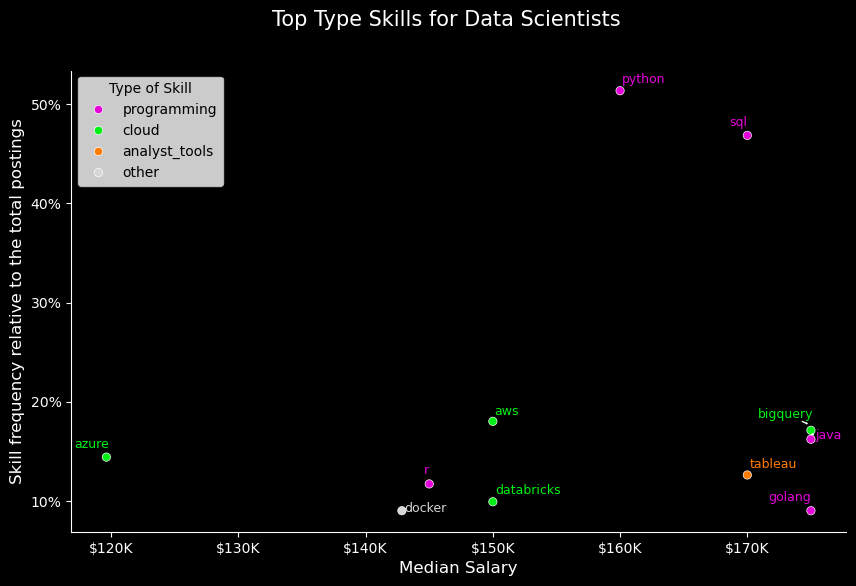

In [9]:
# Plotting for Data Scientists
from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(10, 6))

hue_palette = ["#E403D8", "#00F014","#FF7B00",  "#D6D6D6"]
# Styling
sns.scatterplot(data=df_ds_merge, 
                x='median_salary', 
                y='percent_skill', 
                ax=ax, 
                hue='technology', 
                palette=hue_palette)

ax.legend().set_title('Type of Skill')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y)}%"))
ax.set_facecolor('black')
ax.tick_params(color='white', labelcolor='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_ylabel('Skill frequency relative to the total postings', color='white', fontsize=12)
ax.set_xlabel('Median Salary', color='white', fontsize=12)

# Palette of colors for the different skills (11) - To match the hue palette
palette = [
    "#E403D8", "#E403D8", "#00F014", "#00F014", "#E403D8",
    "#00F014", "#FF7B00", "#E403D8", "#00F014", "#E403D8", "#D6D6D6"
]

# Prepare texts for adjust Text
texts = []

for i, row in df_ds_highd.reset_index().iterrows():
    if i % 2 == 0:
        texts.append(
            ax.text(
                row['median_salary'],
                row['percent_skill'] + 0.5,
                row['job_skills'],
                color=palette[i],
                fontsize=9,
                ha='left'
            )
        )
    else:
        texts.append(
            ax.text(
                row['median_salary'],
                row['percent_skill'] + 0.5,
                row['job_skills'],
                color=palette[i],
                fontsize=9,
                ha='right'
            )
        )        
    

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='white'))



fig.suptitle('Top Type Skills for Data Scientists', color='white', fontsize=15)
fig.patch.set_facecolor('black')
plt.show()
